# (2.1) Basic Terminology

## Iris Flower dataset

Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Read the Dataset


In [2]:
# Reading Iris dataset
iris = pd.read_csv('Iris.csv')

### How many data-points and features?

In [3]:
# For Iris dataset
print("\nIris dataset - Shape:", iris.shape)
print("Number of data-points:", iris.shape[0])
print("Number of features:", iris.shape[1])


Iris dataset - Shape: (150, 5)
Number of data-points: 150
Number of features: 5


### What are the column names in the dataset?

In [4]:
# For Iris dataset
print("\nIris columns:", iris.columns.tolist())


Iris columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


### How many data points for each class are present?
### How many flowers for each species are present?

###Note: balanced-dataset vs imbalanced datasets
###Iris is a balanced dataset as the number of data points for every class is 50.

In [5]:
# For Iris dataset (species classes)
print("\nIris species distribution:")
print(iris['species'].value_counts())


Iris species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# (2.2) 2-D Scatter Plot

###2-D scatter plot:
###ALWAYS understand the axis: labels and scale.



###cannot make much sense out it.
###What if we color the points by thier class-label/flower-type.

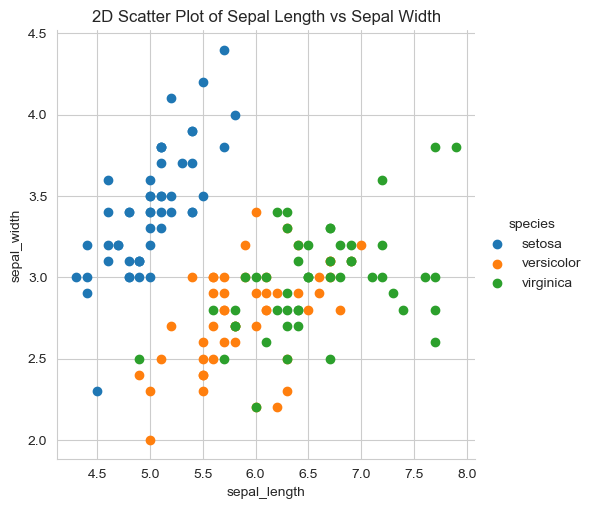

In [6]:
# 2-D Scatter plot for Iris dataset (colored by species)
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.title('2D Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

### 2-D Scatter plot with color-coding for each flower type/class.
### Here 'sns' corresponds to seaborn.

### Notice that the blue points can be easily seperated
### from red and green by drawing a line.
### But red and green data points cannot be easily seperated.
### Can we draw multiple 2-D scatter plots for each combination of features?
### How many cobinations exist? 4C2 = 6.

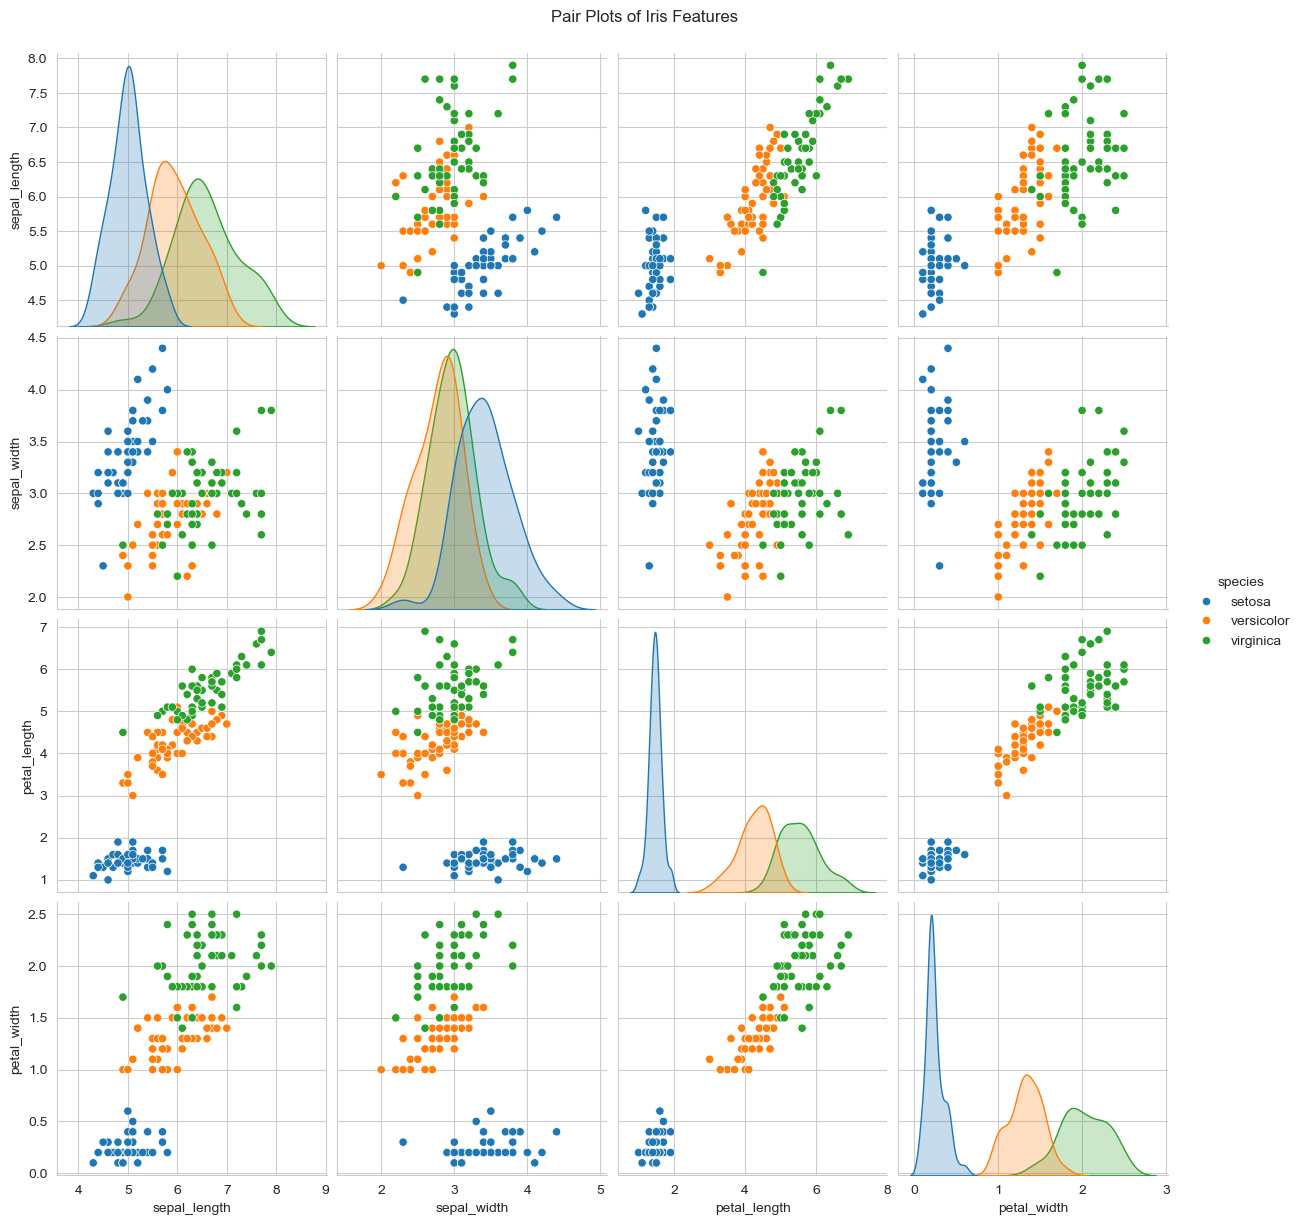


Number of 2D scatter plot combinations: 6


In [7]:
# Pair plot for all combinations of features in Iris dataset
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", height=3)
plt.suptitle('Pair Plots of Iris Features', y=1.02)
plt.show()

# Print number of possible combinations (4C2)
import math
n_features = len(iris.columns) - 1  # excluding species column
n_combinations = math.comb(n_features, 2)
print(f"\nNumber of 2D scatter plot combinations: {n_combinations}")

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

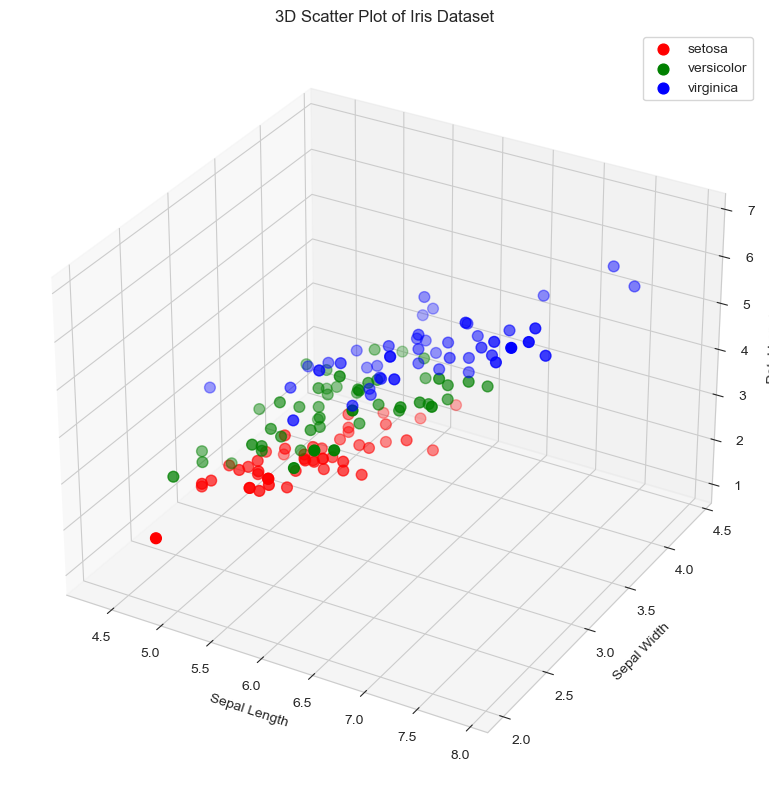

In [8]:
# 3D Scatter plot for Iris dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}

for species in iris['species'].unique():
    df = iris[iris['species'] == species]
    ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'],
               c=colors[species], label=species, s=60)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend()
plt.tight_layout()
plt.show()

#  (2.3) Pair-plot

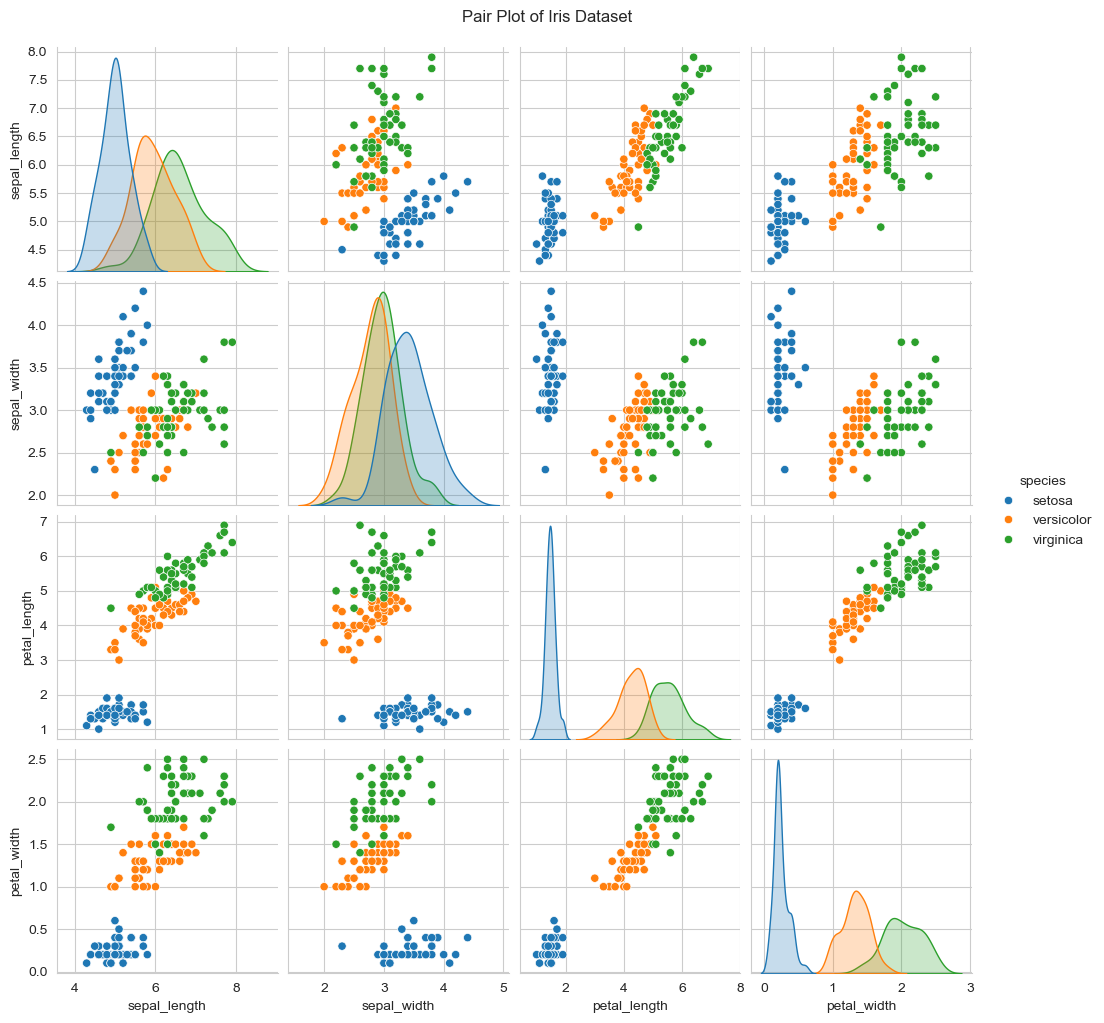

In [9]:
# Pair plot for Iris dataset
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", height=2.5)
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

### pairwise scatter plot: Pair-Plot
### Dis-advantages:
###Can be used when number of features are high.
###Cannot visualize higher dimensional patterns in 3-D and 4-D.
###Only possible to view 2D patterns.

### NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

<Figure size 1000x800 with 0 Axes>

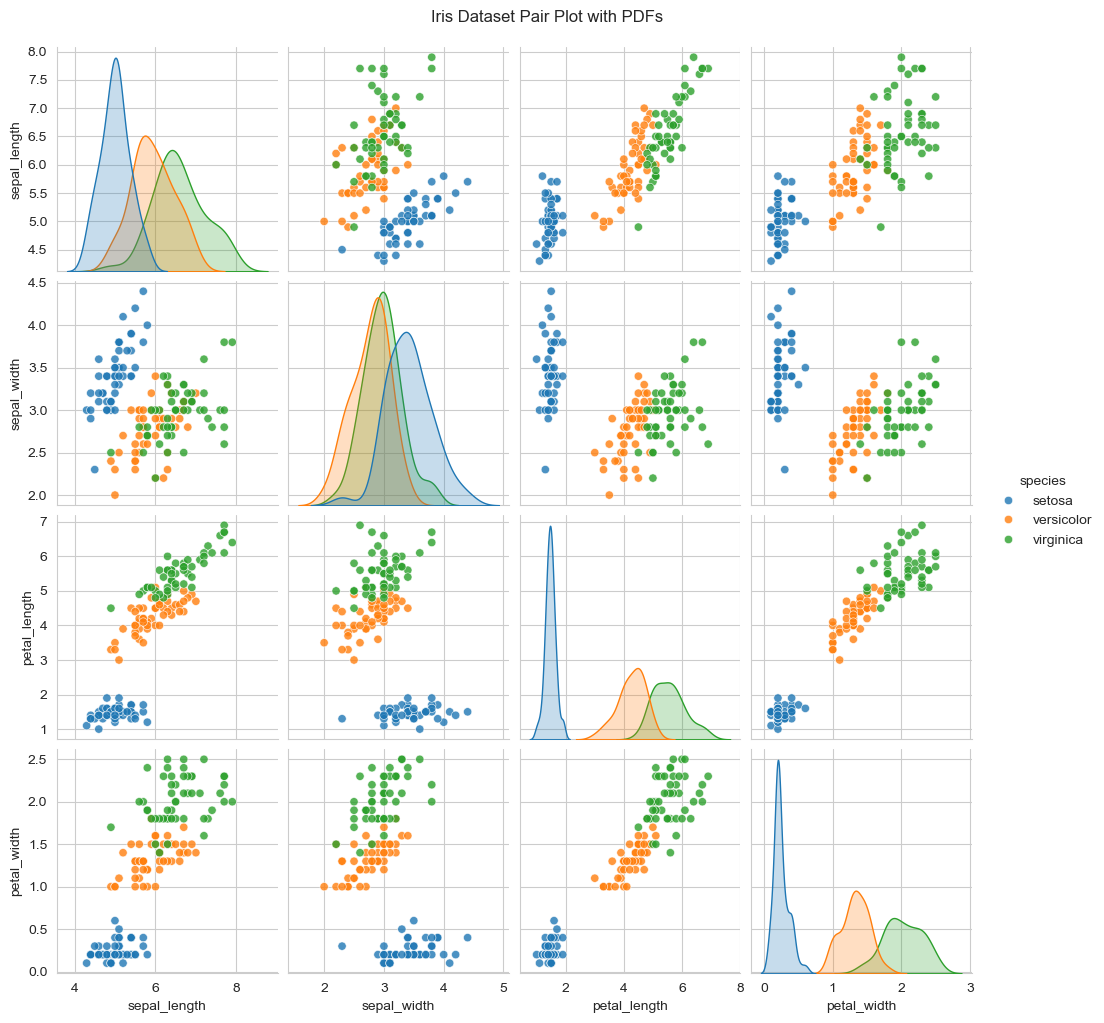

In [10]:
# For Iris dataset
plt.figure(figsize=(10,8))
sns.pairplot(iris, hue='species', diag_kind='kde', 
             plot_kws={'alpha': 0.8}, height=2.5)
plt.suptitle('Iris Dataset Pair Plot with PDFs', y=1.02)
plt.show()

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (2.4) Histogram, Probability Density Function (PDF), Cumulative Density Function (CDF)

### What about 1-D scatter plot using just one feature?
###1-D scatter plot of petal-length

###Disadvantages of 1-D scatter plot: Very hard to make sense as points
###are overlapping a lot.
###Are there better ways of visualizing 1-D scatter plots? Solution: Histograms and Distribution Plot

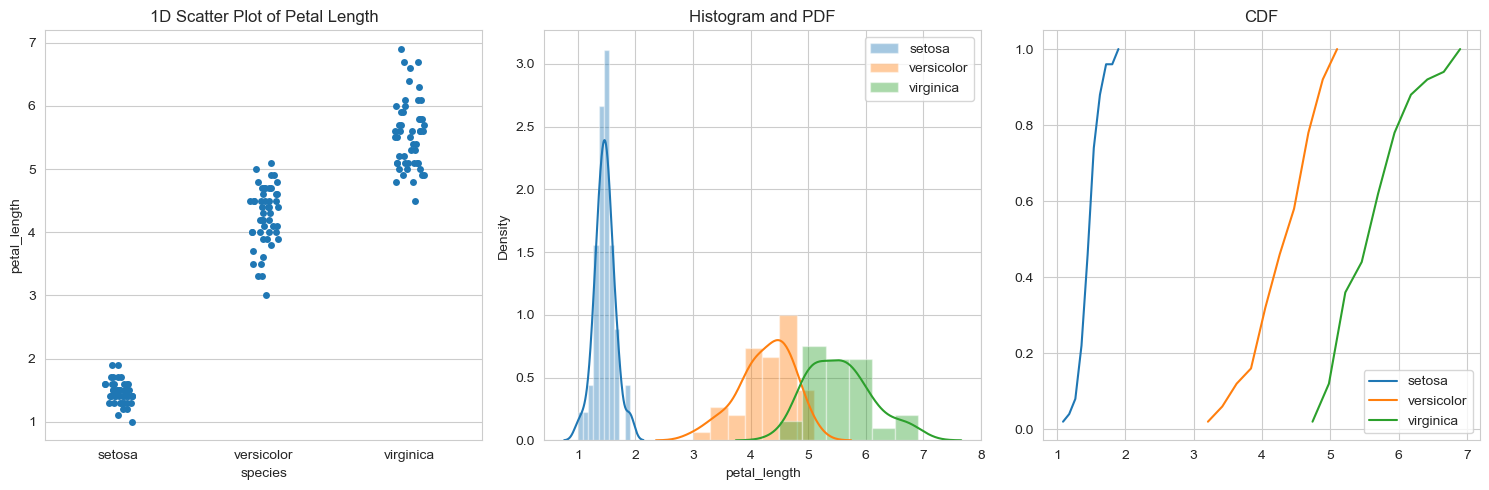

In [11]:
# 1D scatter plot for petal_length in Iris dataset
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.stripplot(x='species', y='petal_length', data=iris, jitter=True)
plt.title('1D Scatter Plot of Petal Length')

# Histogram and PDF
plt.subplot(1,3,2)
sns.distplot(iris[iris['species']=='setosa']['petal_length'], label='setosa')
sns.distplot(iris[iris['species']=='versicolor']['petal_length'], label='versicolor')
sns.distplot(iris[iris['species']=='virginica']['petal_length'], label='virginica')
plt.title('Histogram and PDF')
plt.legend()

# CDF
plt.subplot(1,3,3)
counts, bin_edges = np.histogram(iris[iris['species']=='setosa']['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label='setosa')

counts, bin_edges = np.histogram(iris[iris['species']=='versicolor']['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label='versicolor')

counts, bin_edges = np.histogram(iris[iris['species']=='virginica']['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label='virginica')

plt.title('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Note: The more the Farther the distributions for a feature, the better the feature is> Petal length and petal width are better features. Pteal length is better than petal width because of shorter tail
### Histograms and Probability Density Functions (PDF) using KDE

### Interpreting a PDF:
### Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
### Using just one feature, we can build a simple "model" suing if..else... statements.

### Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?


### Need for Cumulative Distribution Function (CDF)- Blue line-PDF and Orange line-CDF
### CDF always lies between 0-1
### You can build a PDF by drawing a Histogram and then smoothing it
### The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x
### CDF at a particular point is the Area under the curve of PDF until that point. Hence if you differentiate your CDF you will get ur PDF. If you do integration on your PDF you will get CDF
### We can visually see what percentage of versicolor flowers have a
### petal_length of less than 5?

###lot CDF of petal_length




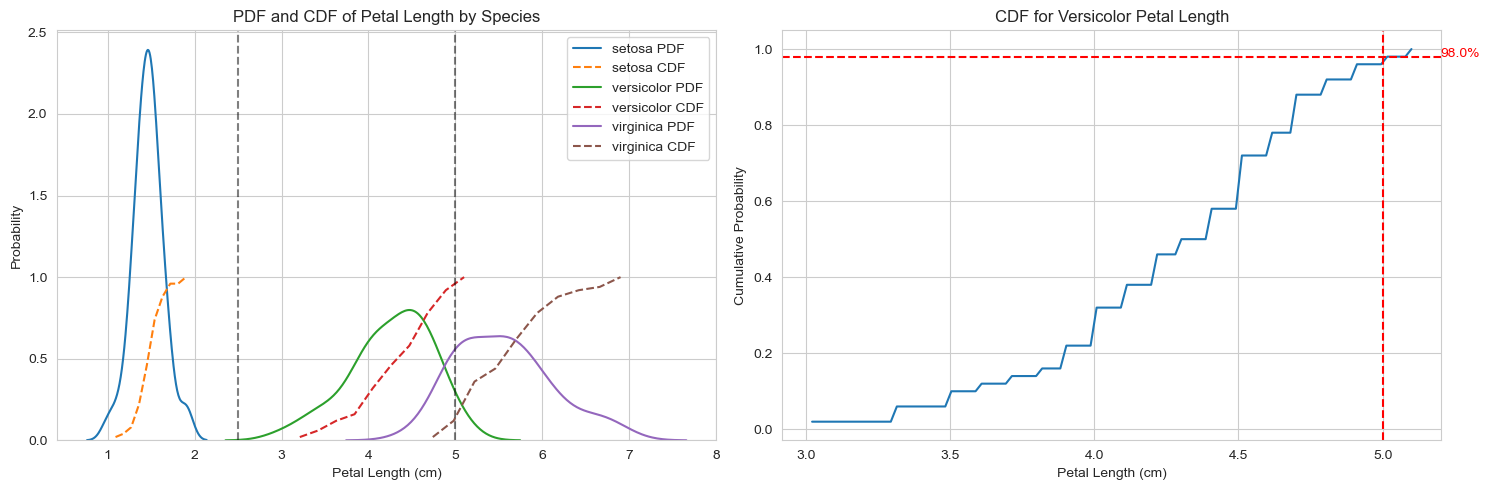

Percentage of versicolor flowers with petal_length < 5: 98.00%


In [12]:
# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(15, 5))

# 1. PDF and CDF for petal_length by species
plt.subplot(1, 2, 1)
for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    sns.kdeplot(data, label=f'{species} PDF')
    counts, bin_edges = np.histogram(data, bins=10, density=True)
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], cdf, '--', label=f'{species} CDF')
    
plt.axvline(2.5, color='black', linestyle='--', alpha=0.5)
plt.axvline(5.0, color='black', linestyle='--', alpha=0.5)
plt.title('PDF and CDF of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.legend()

# 2. Calculate percentage of versicolor with petal_length < 5
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
counts, bin_edges = np.histogram(versicolor, bins=100, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
idx = np.searchsorted(bin_edges[1:], 5.0)
percentage = cdf[idx] * 100

plt.subplot(1, 2, 2)
plt.plot(bin_edges[1:], cdf)
plt.axvline(5.0, color='r', linestyle='--')
plt.axhline(cdf[idx], color='r', linestyle='--')
plt.text(5.2, cdf[idx], f'{percentage:.1f}%', color='r')
plt.title('CDF for Versicolor Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

# Print the exact percentage
print(f"Percentage of versicolor flowers with petal_length < 5: {percentage:.2f}%")

### Need for Cumulative Distribution Function (CDF)
### We can visually see what percentage of versicolor flowers have a
### petal_length of less than 1.6?
### How to construct a CDF?
### How to read a CDF?

###Plot CDF of petal_length



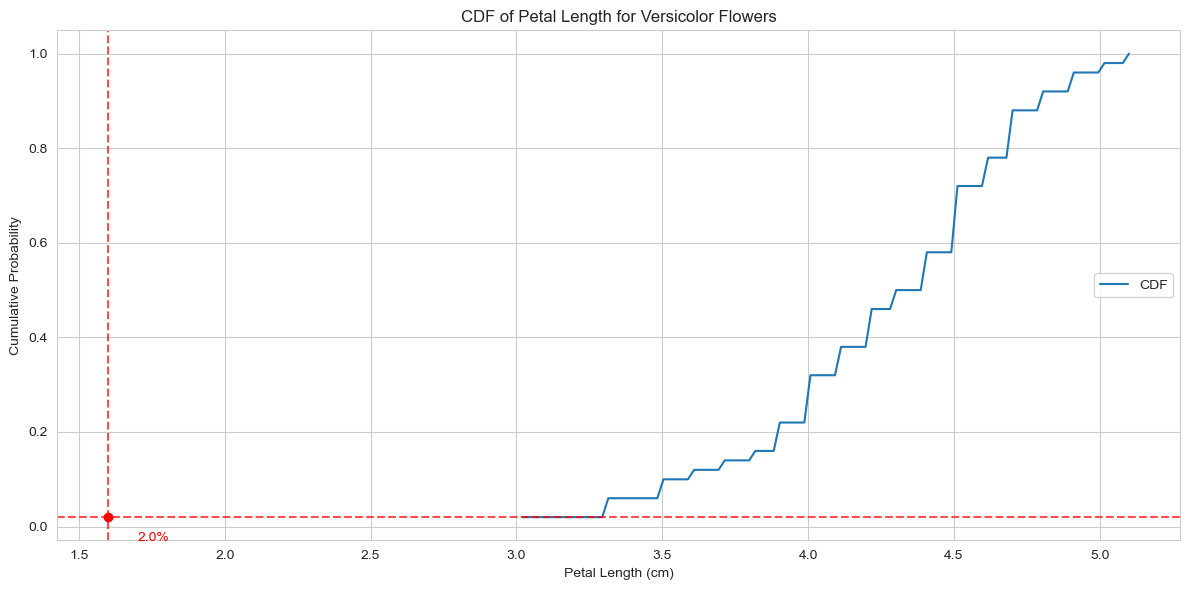

Percentage of versicolor flowers with petal_length < 1.6: 2.00%


In [13]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Extract versicolor petal lengths
versicolor = iris[iris['species'] == 'versicolor']['petal_length']

# Calculate histogram, PDF and CDF
counts, bin_edges = np.histogram(versicolor, bins=100, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

# Find the percentage for petal_length < 1.6
target_length = 1.6
idx = np.searchsorted(bin_edges[1:], target_length)
percentage = cdf[idx] * 100

# Plot CDF
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.axvline(target_length, color='r', linestyle='--', alpha=0.7)
plt.axhline(cdf[idx], color='r', linestyle='--', alpha=0.7)
plt.scatter([target_length], [cdf[idx]], color='r')
plt.text(target_length+0.1, cdf[idx]-0.05, f'{percentage:.1f}%', color='r')

# Formatting
plt.title('CDF of Petal Length for Versicolor Flowers')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print exact percentage
print(f"Percentage of versicolor flowers with petal_length < {target_length}: {percentage:.2f}%")

### Plots of CDF of petal_length for various types of flowers.

### Misclassification error if you use petal_length only.



setosa: 0/50 misclassified (0.0%) at petal_length ≤ 2.5
versicolor: 0/50 misclassified (0.0%) at petal_length ≤ 2.5
virginica: 0/50 misclassified (0.0%) at petal_length ≤ 2.5


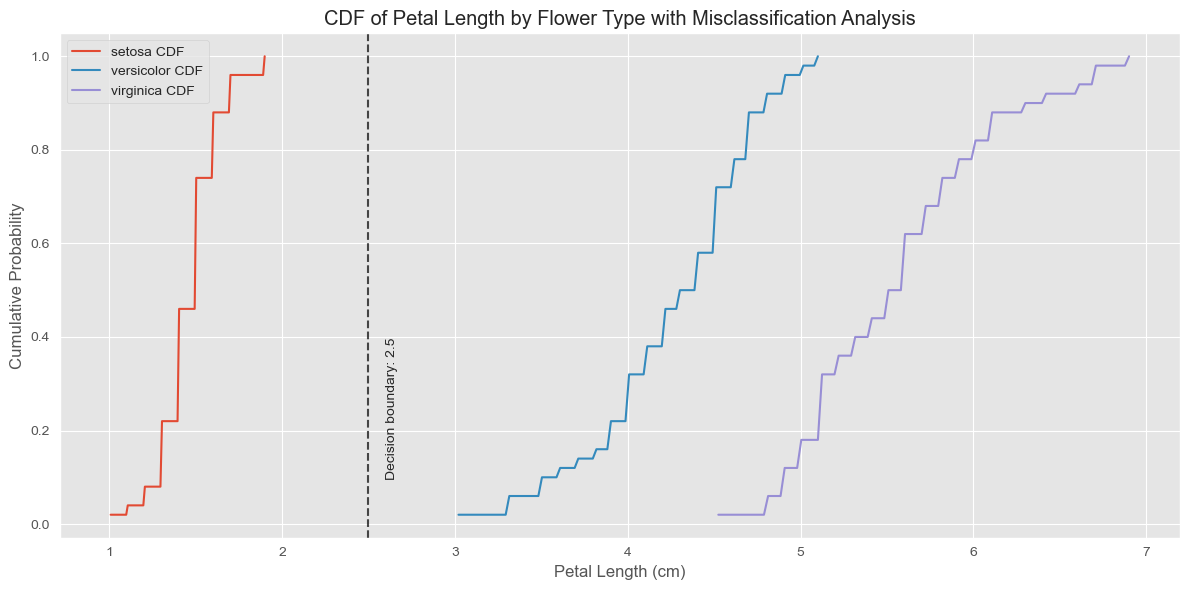

In [14]:
# Set style
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

# Define decision boundary (adjust this to see different classification scenarios)
decision_boundary = 2.5  # Example boundary between setosa and others

# Plot CDF for each species
for species in iris['species'].unique():
    petal_lengths = iris[iris['species'] == species]['petal_length']
    counts, bin_edges = np.histogram(petal_lengths, bins=100, density=True)
    cdf = np.cumsum(counts) / sum(counts)
    plt.plot(bin_edges[1:], cdf, label=f'{species} CDF')
    
    # Calculate misclassification at decision boundary
    misclassified = sum((petal_lengths <= decision_boundary) != (species == 'setosa'))
    total = len(petal_lengths)
    print(f"{species}: {misclassified}/{total} misclassified ({misclassified/total:.1%}) at petal_length ≤ {decision_boundary}")

# Add decision boundary line
plt.axvline(decision_boundary, color='black', linestyle='--', alpha=0.7)
plt.text(decision_boundary+0.1, 0.1, f'Decision boundary: {decision_boundary}', rotation=90)

# Format plot
plt.title('CDF of Petal Length by Flower Type with Misclassification Analysis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# (2.5) Mean, Variance and Std-dev

###Mean, Variance, Std-deviation,
###Mean with an outlier.





In [15]:
# For Iris dataset (petal_length)
print("Iris Dataset - Petal Length Stats:")
for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    print(f"\n{species}:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Variance: {np.var(data):.2f}")
    print(f"Std Dev: {np.std(data):.2f}")
    print(f"Median: {np.median(data):.2f}")

# Effect of outlier
print("\n\nEffect of Outlier:")
sample_data = iris[iris['species'] == 'setosa']['petal_length'].head(10)
print("Original data mean:", np.mean(sample_data))
print("Original data median:", np.median(sample_data))

# Add outlier
sample_with_outlier = np.append(sample_data, 10)
print("\nWith outlier (10) added:")
print("New mean:", np.mean(sample_with_outlier))
print("New median:", np.median(sample_with_outlier))

Iris Dataset - Petal Length Stats:

setosa:
Mean: 1.46
Variance: 0.03
Std Dev: 0.17
Median: 1.50

versicolor:
Mean: 4.26
Variance: 0.22
Std Dev: 0.47
Median: 4.35

virginica:
Mean: 5.55
Variance: 0.30
Std Dev: 0.55
Median: 5.55


Effect of Outlier:
Original data mean: 1.45
Original data median: 1.4

With outlier (10) added:
New mean: 2.227272727272727
New median: 1.4


### (2.6) Median, Percentile, Quantile, Interquartile Range (IQR), Median Absolute Deviation (MAD)

###Median, Quantiles, Percentiles, IQR.

###Median with an outlier



Iris Dataset - Petal Length Robust Statistics:

setosa:
Median: 1.50
Quantiles (25%, 50%, 75%): [1.4   1.5   1.575]
90th Percentile: 1.70
IQR: 0.18
MAD: 0.10

versicolor:
Median: 4.35
Quantiles (25%, 50%, 75%): [4.   4.35 4.6 ]
90th Percentile: 4.80
IQR: 0.60
MAD: 0.35

virginica:
Median: 5.55
Quantiles (25%, 50%, 75%): [5.1   5.55  5.875]
90th Percentile: 6.31
IQR: 0.78
MAD: 0.45


Effect of Outlier on Median vs Mean:
Original data:
Values: [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5]
Mean: 1.45
Median: 1.40

With outlier (10) added:
Values: [ 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5 10. ]
New mean: 2.23
New median: 1.40


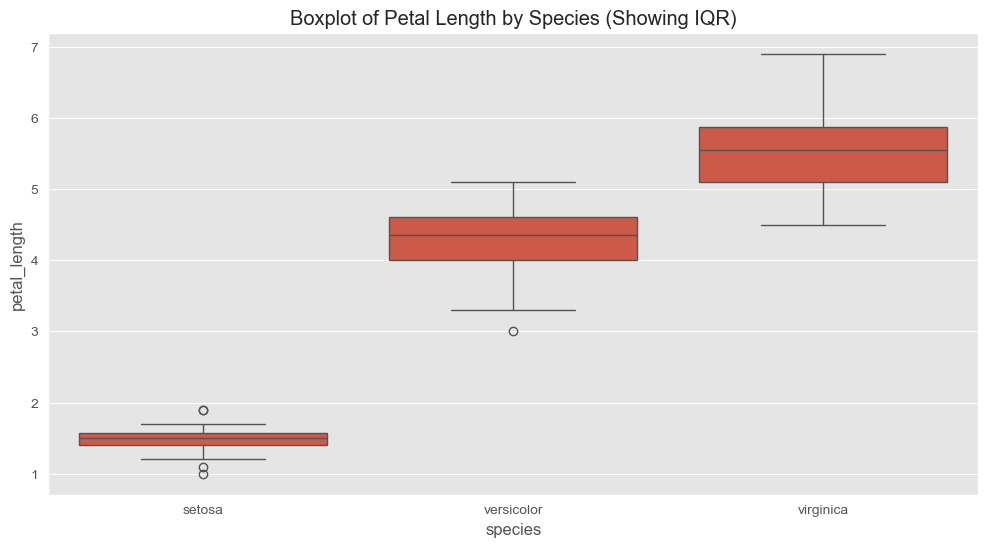

In [16]:
from scipy import stats

# For Iris dataset (petal_length)
print("Iris Dataset - Petal Length Robust Statistics:")
for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    print(f"\n{species}:")
    print(f"Median: {np.median(data):.2f}")
    print(f"Quantiles (25%, 50%, 75%): {np.quantile(data, [0.25, 0.5, 0.75])}")
    print(f"90th Percentile: {np.percentile(data, 90):.2f}")
    print(f"IQR: {stats.iqr(data):.2f}")
    print(f"MAD: {stats.median_abs_deviation(data):.2f}")

# Effect of outlier on median vs mean
print("\n\nEffect of Outlier on Median vs Mean:")
sample_data = iris[iris['species'] == 'setosa']['petal_length'].head(10).values
print("Original data:")
print(f"Values: {sample_data}")
print(f"Mean: {np.mean(sample_data):.2f}")
print(f"Median: {np.median(sample_data):.2f}")

# Add outlier
sample_with_outlier = np.append(sample_data, 10)
print("\nWith outlier (10) added:")
print(f"Values: {sample_with_outlier}")
print(f"New mean: {np.mean(sample_with_outlier):.2f}")
print(f"New median: {np.median(sample_with_outlier):.2f}")

# Boxplot to visualize IQR and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Boxplot of Petal Length by Species (Showing IQR)')
plt.show()

# (2.7) Box plot and Whiskers


###Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
### The Concept of median, percentile, quantile.
### How to draw the box in the box-plot?
### How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
### IQR like idea.

###NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers.
###Whiskers in the plot below donot correposnd to the min and max values.

###Box-plot can be visualized as a PDF on the side-ways.




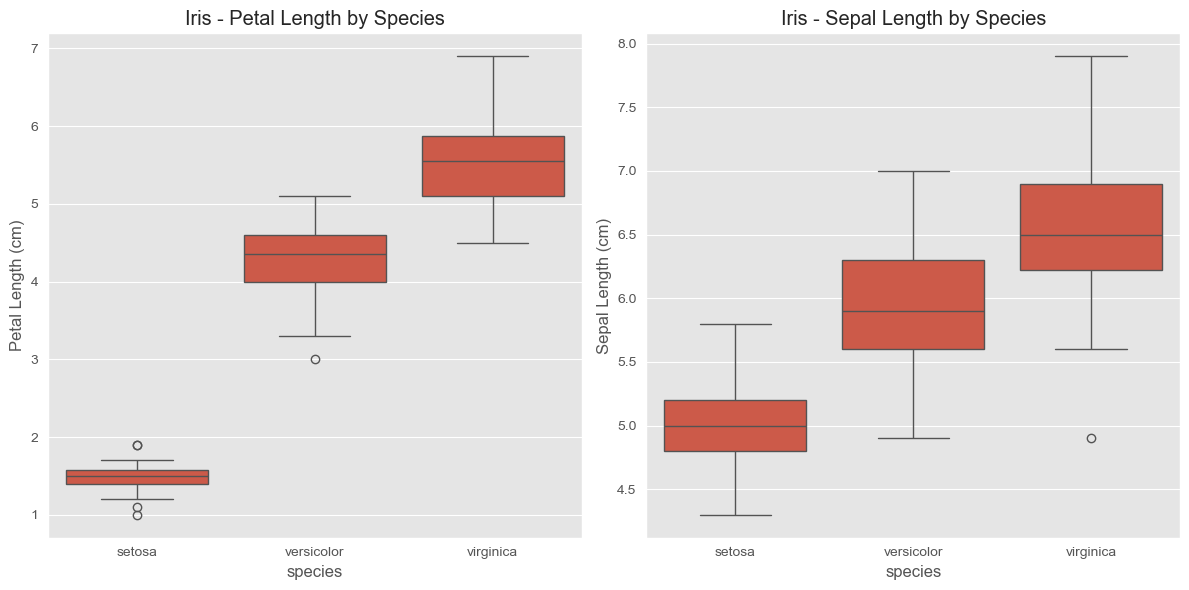

NameError: name 'haberman' is not defined

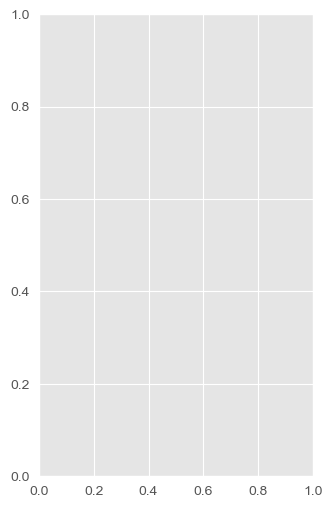

In [17]:
# Box plots for Iris dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Iris - Petal Length by Species')
plt.ylabel('Petal Length (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Iris - Sepal Length by Species')
plt.ylabel('Sepal Length (cm)')
plt.tight_layout()
plt.show()

# Box plots for Haberman dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='status', y='age', data=haberman)
plt.title('Haberman - Age by Status')

plt.subplot(1, 3, 2)
sns.boxplot(x='status', y='year', data=haberman)
plt.title('Haberman - Year by Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Haberman - Nodes by Status')
plt.tight_layout()
plt.show()

# Detailed box plot with annotations to explain components
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='species', y='petal_length', data=iris)

# Annotate the box plot components
medians = iris.groupby('species')['petal_length'].median().values
q1 = iris.groupby('species')['petal_length'].quantile(0.25).values
q3 = iris.groupby('species')['petal_length'].quantile(0.75).values

for i, species in enumerate(iris['species'].unique()):
    ax.text(i, medians[i], f'Median: {medians[i]:.1f}', 
            horizontalalignment='center', color='white', weight='semibold')
    ax.text(i, q1[i], f'Q1: {q1[i]:.1f}', 
            horizontalalignment='center', verticalalignment='top', color='blue')
    ax.text(i, q3[i], f'Q3: {q3[i]:.1f}', 
            horizontalalignment='center', verticalalignment='bottom', color='green')

plt.title('Detailed Box Plot with Annotations')
plt.ylabel('Petal Length (cm)')
plt.show()

# (2.8) Violin plots

### A violin plot combines the benefits of the previous two plots and simplifies them

### Denser regions of the data are fatter, and sparser ones thinner in a violin plot


In [ ]:
# Violin plots for Iris dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='species', y='petal_length', data=iris, inner='quartile')
plt.title('Iris - Petal Length Distribution')
plt.ylabel('Petal Length (cm)')

plt.subplot(1, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris, inner='stick')
plt.title('Iris - Sepal Width Distribution')
plt.ylabel('Sepal Width (cm)')
plt.tight_layout()
plt.show()

# Violin plots for Haberman dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.violinplot(x='status', y='age', data=haberman, inner='box')
plt.title('Haberman - Age Distribution')

plt.subplot(1, 3, 2)
sns.violinplot(x='status', y='year', data=haberman, inner='point')
plt.title('Haberman - Year Distribution')

plt.subplot(1, 3, 3)
sns.violinplot(x='status', y='nodes', data=haberman, inner='quartile')
plt.title('Haberman - Nodes Distribution')
plt.tight_layout()
plt.show()

# Combined violin and box plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_length', data=iris, inner=None)
sns.boxplot(x='species', y='petal_length', data=iris, width=0.1, boxprops={'facecolor':'none'})
plt.title('Combined Violin and Box Plot')
plt.ylabel('Petal Length (cm)')
plt.show()

# (2.9) Exercise:
1. Use the Haberman Cancer Survival dataset given in the current directory
2. Perform a similar anaysis as above on this dataset with the following sections:
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful for classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.